In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def reg_data(p3, p4):
  p3 = pd.read_csv(p3)
  p4 = pd.read_csv(p4)
  return p3, p4

In [3]:
train_data, test_data = reg_data('CE802_P3_Data.csv', 'CE802_P3_Test.csv')

# Descriptive Analysis

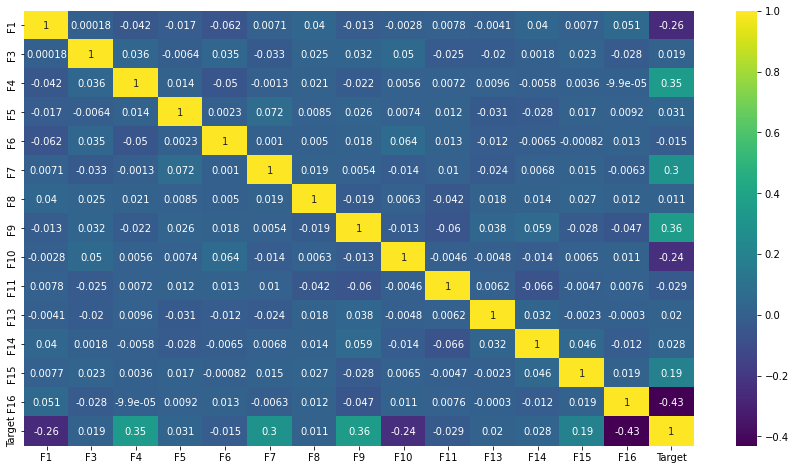

In [4]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot= True, cmap = 'viridis')

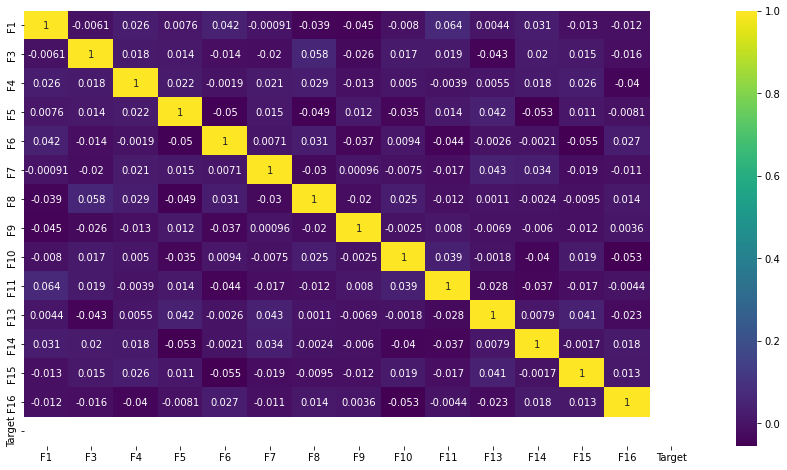

In [5]:
plt.figure(figsize = (15,8))
sns.heatmap(test_data.corr(), annot= True, cmap = 'viridis')

In [6]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,596.16,Rest,72.24,6.00,154.48,184.18,226.65,-8.21,18.46,10,6547.48,Very high,9.24,0.69,3,45.06,NaN
1,1851.57,Europe,63.09,10.47,200.93,183.48,1101.51,-7.91,3.76,4,-983.62,Medium,8.20,17.90,5,88.64,NaN
2,-945.60,USA,71.22,8.25,190.35,243.96,924.93,-6.35,2.48,6,-2366.10,Very high,11.10,329.72,2,-41.36,NaN
3,1153.38,Europe,62.52,7.41,165.21,245.64,1017.09,-5.84,6.58,14,-503.06,High,7.53,0.00,2,-91.60,NaN
4,-261.63,UK,60.87,10.14,201.96,216.28,1350.96,-2.75,4.02,6,19521.62,High,8.99,360.26,4,154.32,NaN


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(train_data['F2'])
train_data['F2'] = encoder1.fit_transform(train_data['F2'])
encoder1.fit(train_data['F12'])
train_data['F12'] = encoder1.fit_transform(train_data['F12'])
test_data['F2'] = encoder1.fit_transform(test_data['F2'])
test_data['F12'] = encoder1.fit_transform(test_data['F12'])

In [8]:
train_features = train_data.drop(columns = 'Target')
test_features = train_data['Target']
testing_regression = test_data.drop(columns = 'Target')

In [9]:
from sklearn.model_selection import train_test_split
train1, test1, train2, test2 = train_test_split(train_features, test_features, test_size = 0.25)

In [10]:
train1.shape

(1125, 16)

# Regression models

In [11]:
from sklearn.linear_model import LinearRegression
obj1 = LinearRegression()
obj1.fit(train1, train2)
linear_pred = obj1.predict(test1)

In [12]:
from sklearn.tree import DecisionTreeRegressor
obj2 = DecisionTreeRegressor()
obj2.fit(train1, train2)
dec_pred = obj2.predict(test1)

In [13]:
from sklearn.linear_model import Lasso
obj3 = Lasso()
obj3.fit(train1, train2)
lasso_pred = obj3.predict(test1)

# Accuracies

In [14]:
from sklearn.metrics import r2_score
print('The f2 score of linear regression model on first drug dataset ', r2_score(linear_pred, test2))
print('The f2 score of Decision Tree Regressor on first drug dataset ', r2_score(dec_pred, test2))
print('The f2 score of Random Forest Regressor on first drug dataset ', r2_score(lasso_pred, test2))

The f2 score of linear regression model on first drug dataset  0.5390108991949243
The f2 score of Decision Tree Regressor on first drug dataset  0.1030091404110256
The f2 score of Random Forest Regressor on first drug dataset  0.5385020679542052


# predictions

In [15]:
test_pred1 = obj1.predict(testing_regression)
test_pred2 = obj2.predict(testing_regression)
test_pred3 = obj3.predict(testing_regression)

In [16]:
test_data['linear pred'] = test_pred1
test_data['decision tree pred'] = test_pred2
test_data['Lasso pred'] = test_pred3

In [17]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,linear pred,decision tree pred,Lasso pred
0,596.16,1,72.24,6.00,154.48,184.18,226.65,-8.21,18.46,10,6547.48,3,9.24,0.69,3,45.06,NaN,464.071077,288.54,465.515032
1,1851.57,0,63.09,10.47,200.93,183.48,1101.51,-7.91,3.76,4,-983.62,2,8.20,17.90,5,88.64,NaN,-91.648099,0.00,-90.261748
2,-945.60,3,71.22,8.25,190.35,243.96,924.93,-6.35,2.48,6,-2366.10,3,11.10,329.72,2,-41.36,NaN,1327.052691,1417.98,1327.038063
3,1153.38,0,62.52,7.41,165.21,245.64,1017.09,-5.84,6.58,14,-503.06,0,7.53,0.00,2,-91.60,NaN,497.814451,1750.53,499.559114
4,-261.63,2,60.87,10.14,201.96,216.28,1350.96,-2.75,4.02,6,19521.62,0,8.99,360.26,4,154.32,NaN,236.195069,305.34,234.854237


In [19]:
test_data.to_csv('regression pred2.csv')